In [70]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10.5, 6]

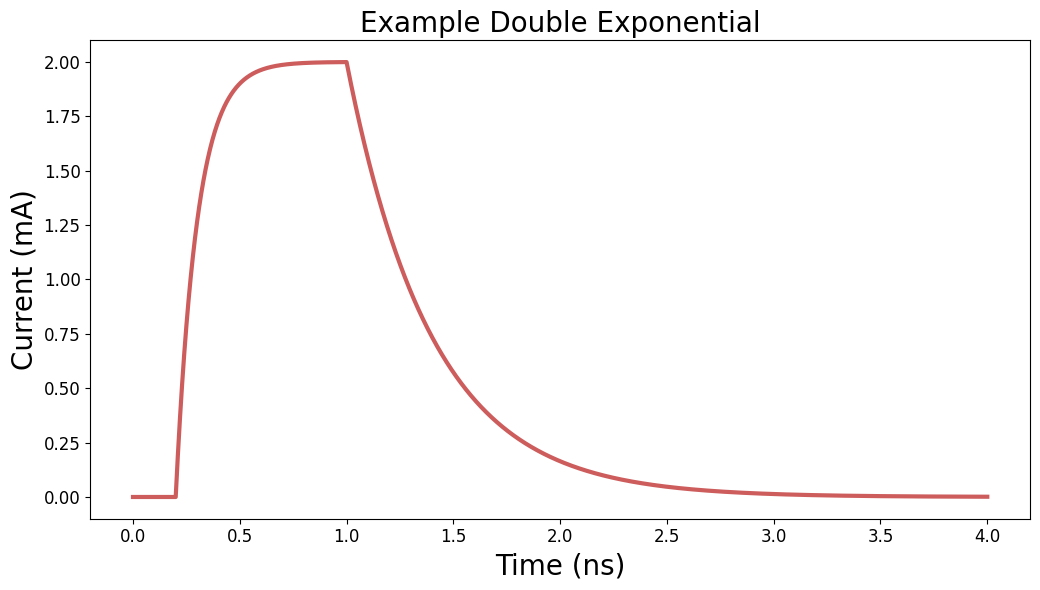

In [71]:
# create double exponential waveform

import numpy as np
import math
import matplotlib.pyplot as plt

t_r = 0.2e-9
t_f = 1e-9
tau_r = 0.1e-9
tau_f = 0.4e-9
I_peak = 2e-3
I_initial = 0

t_start = 0
t_stop = 4e-9
t_step = 1e-12

t_values = []
y_values = []

t = t_start
y = 0
while t <= t_stop:

    if (t < t_r):
        y = I_initial
    elif(t_r <= t < t_f):
        y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r))
    else:
        y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r)) - (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_f)) / tau_f))

    t_values.append(t * 1e9)
    y_values.append(y * 1000)
    t += t_step


plt.plot(t_values, y_values, color='indianred', linewidth=3)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Current (mA)', fontsize=20)
plt.title('Example Double Exponential', fontsize=20)
#plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("EX_Double_Exponential")
plt.show()


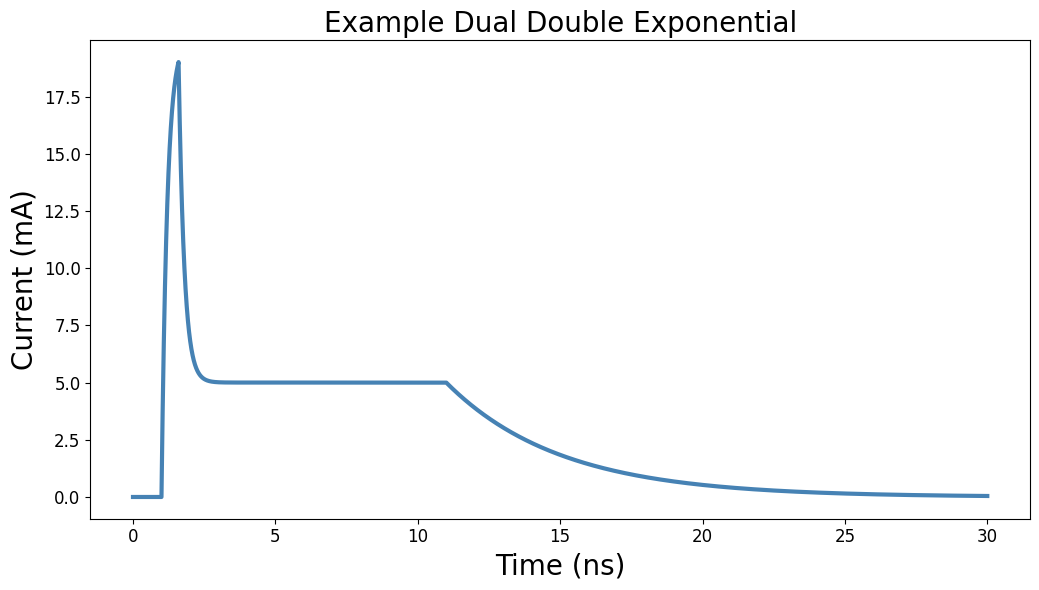

In [72]:
# create dual double exponential waveform

import numpy as np
import math
import matplotlib.pyplot as plt

t_r = 1e-9
t_f = 11e-9
tau_r = 0.2e-9
tau_f = 4e-9
I_peak = 5e-3
I_initial = 0e-3

t_r_2 = 1e-9
t_f_2 = 1.6e-9
tau_r_2 = 0.2e-9
tau_f_2 = 0.2e-9
I_peak_2 = 15e-3
I_initial_2 = 0

t_start = 0
t_stop = 30e-9
t_step = 1e-12

t_values = []
y_values = []

t_values_2 = []
y_values_2 = []

t = t_start
y = 0
while t <= t_stop:

    if (t < t_r):
        y = I_initial
    elif(t_r <= t < t_f):
        y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r))
    else:
        y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r)) - (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_f)) / tau_f))

    t_values.append(t * 1e9)
    y_values.append(y * 1000)
    t += t_step

t = t_start
y = 0
while t <= t_stop:

    if (t < t_r_2):
        y = I_initial_2
    elif(t_r_2 <= t < t_f_2):
        y = I_initial_2 + (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_r_2)) / tau_r_2))
    else:
        y = I_initial_2 + (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_r_2)) / tau_r_2)) - (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_f_2)) / tau_f_2))

    t_values_2.append(t * 1e9)
    y_values_2.append(y * 1000)
    t += t_step

final_y_values = [a + b for a,b in zip(y_values, y_values_2)]

plt.plot(t_values, final_y_values, color='steelblue', linewidth=3)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Current (mA)', fontsize=20)
plt.title('Example Dual Double Exponential', fontsize=20)
#plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("EX_Dual_Double_Exponential")
plt.show()


4.000216050205062


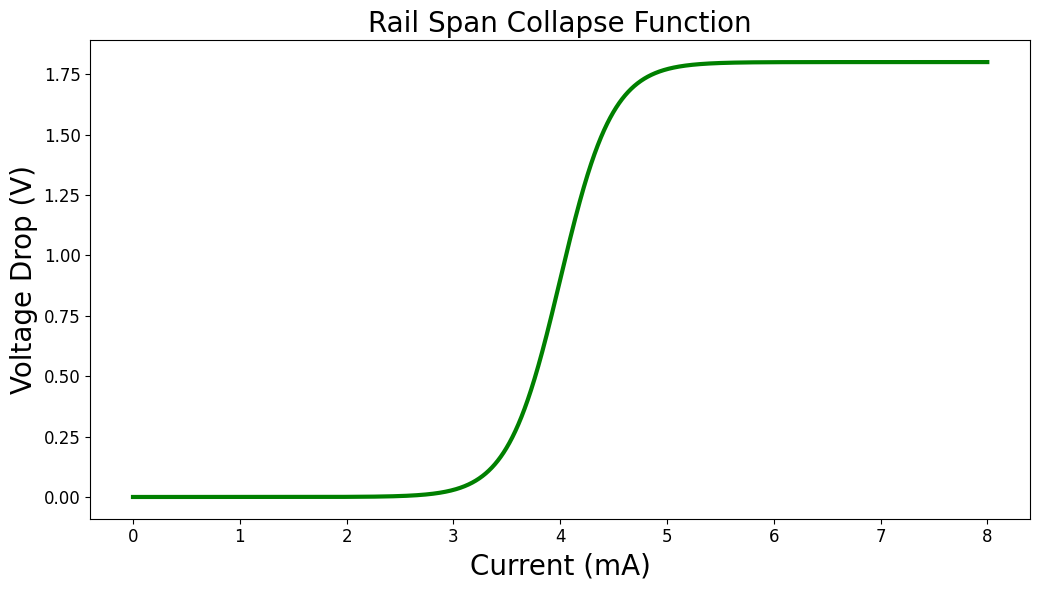

In [73]:
# rail span collapse function

import numpy as np
import math
import matplotlib.pyplot as plt

V_nominal = 1.8
k = 4.1
V_limit = 0.01
I_limit = 2.735

I_start = 0
I_stop = 8
I_step = 1e-3

I_values = []
V_values = []

I = I_start
V = 0
I_0 = I_limit - (math.log(V_limit / (V_nominal - V_limit)) / k)

print(I_0)

while I <= I_stop:
    V = V_nominal / (1 + math.exp(-k * (I - I_0)))

    I_values.append(I)
    V_values.append(V)
    I += I_step


plt.plot(I_values, V_values, color='green', linewidth=3)
plt.xlabel('Current (mA)', fontsize=20)
plt.ylabel('Voltage Drop (V)', fontsize=20)
# plt.ylim(0, 1.9)
# plt.xlim(0, 8)
plt.title('Rail Span Collapse Function', fontsize=20)
#plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("Rail_Collapse_Function")
plt.show()


/tmp/ipykernel_185410/2313777942.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=12)
/tmp/ipykernel_185410/2313777942.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticks(), fontsize=12)
/tmp/ipykernel_185410/2313777942.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)


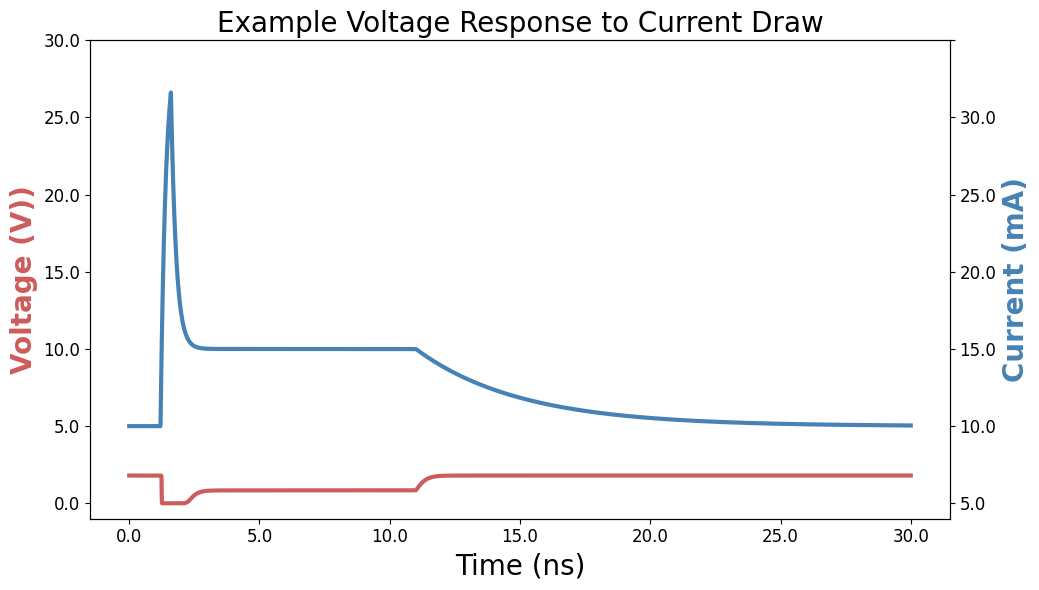

In [74]:
# rail span collapse example

V_nominal = 1.8
k = 4.1
V_limit = 0.01
I_limit = 8.7

I_0 = I_limit - (math.log(V_limit / (V_nominal - V_limit)) / k)

def rail_collapse(I):
    V = V_nominal / (1 + math.exp(-k * (I - I_0)))
    return V


t_r = 1.2e-9
t_f = 11e-9
tau_r = 0.2e-9
tau_f = 4e-9
I_peak = 10e-3
I_initial = 5e-3

t_r_2 = 1.2e-9
t_f_2 = 1.6e-9
tau_r_2 = 0.2e-9
tau_f_2 = 0.2e-9
I_peak_2 = 20e-3
I_initial_2 = 0

t_start = 0
t_stop = 30e-9
t_step = 1e-12

def double_exp_1(t):
    if (t < t_r):
        y = I_initial
    elif(t_r <= t < t_f):
        y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r))
    else:
        y = I_initial + (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_r)) / tau_r)) - (I_peak - I_initial) * (1 - math.exp((-1 * (t - t_f)) / tau_f))

    return y



def double_exp_2(t):
    if (t < t_r_2):
        y = I_initial_2
    elif(t_r_2 <= t < t_f_2):
        y = I_initial_2 + (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_r_2)) / tau_r_2))
    else:
        y = I_initial_2 + (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_r_2)) / tau_r_2)) - (I_peak_2 - I_initial_2) * (1 - math.exp((-1 * (t - t_f_2)) / tau_f_2))

    return y


t_values = []
V_values = []
I_values = []

t = t_start
V = 0

while t <= t_stop:
    V = V_nominal - rail_collapse((double_exp_1(t) + double_exp_2(t)) * 1000)
    
    t_values.append(t * 1e9)
    V_values.append(V)
    I_values.append((double_exp_1(t) + double_exp_2(t)) * 1000)
    t += t_step

# plt.plot(t_values, V_values, color='indianred', linewidth=2)
# plt.plot(t_values, I_values, color='steelblue', linewidth=2)
# plt.xlabel('Time (ns)')
# plt.ylabel('Voltage Drop (V)')
# plt.title('Rail Span Collapse Function')
# plt.show()


fig, ax1 = plt.subplots()

ax1.plot(t_values, V_values, color='indianred', linewidth=3)
ax1.set_xlabel("Time (ns)", fontsize=20)
ax1.set_ylim(-1, 30)
ax1.set_ylabel("Voltage (V))", color='indianred', fontsize=20, fontweight='bold')
ax1.set_title('Example Voltage Response to Current Draw', fontsize=20)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=12)
ax1.set_xticklabels(ax1.get_xticks(), fontsize=12)

ax2 = ax1.twinx()

ax2.plot(t_values, I_values, color='steelblue', linewidth=3)
ax2.set_ylabel("Current (mA)", color='steelblue', fontsize=20, fontweight='bold')
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)
ax2.set_ylim(-1, 30)
plt.tight_layout()
plt.savefig("Rail_Collapse_Response")
plt.show()


[Warning] Variable data type is detected as double precision.


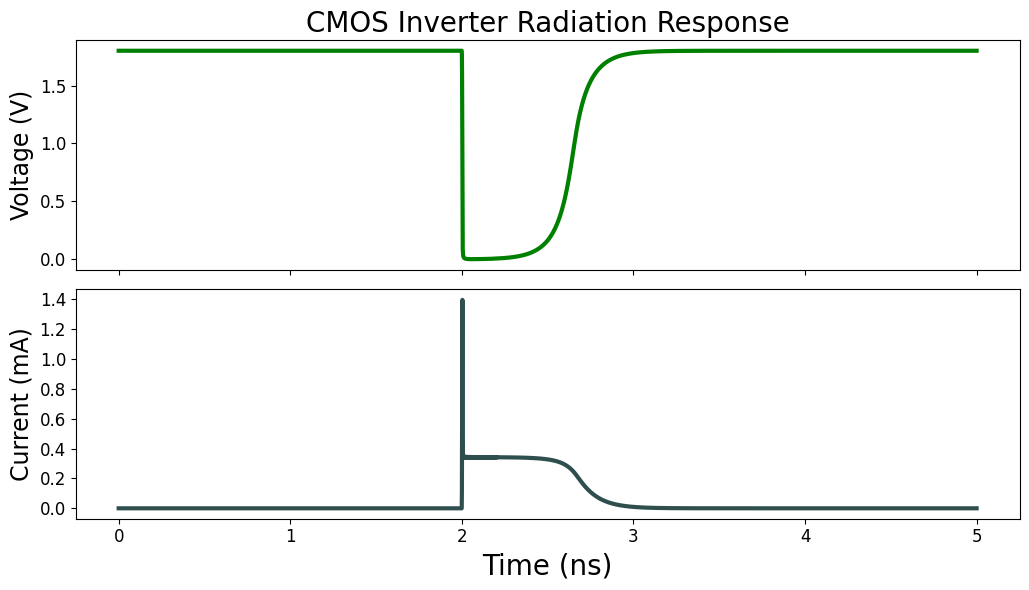

In [84]:
# plot inverter charge injection

import ltspice

l = ltspice.Ltspice('Inverter_Sim.raw')
l.parse()

time = 1e9 * l.get_time()
v_out = l.get_data('v(out)')
i_in = -1e3 * l.get_data('I(@b.x1.b2[i])')

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(time, v_out, linewidth=3, color='green')
ax1.set_ylabel('Voltage (V)', fontsize=17)
ax1.set_title('CMOS Inverter Radiation Response', fontsize=20)

ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='y', labelsize=12)

ax2.plot(time, i_in, linewidth=3, color="darkslategrey")
ax2.set_ylabel('Current (mA)', fontsize=17)
ax2.set_xlabel('Time (ns)', fontsize=20)
#ax2.set_xticklabels(ax2.get_xticks(),fontsize=12)
#ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("Inverter_Response")
plt.show()
